### Super Store Dataset

In [1]:
# Importing the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
# Import the dataset
encoding = 'unicode_escape'
storedataset = pd.read_csv('/Users/priyankac/Downloads/Time Series/Super Store.csv', encoding = 'unicode_escape')

In [3]:
storedataset.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
3,6,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
4,11,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092


In [4]:
# Checking the number of rows and columns in the dataset
storedataset.shape

(2121, 21)

In [5]:
# Checking the data types
storedataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2121 entries, 0 to 2120
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         2121 non-null   int64  
 1   Order ID       2121 non-null   object 
 2   Order Date     2121 non-null   object 
 3   Ship Date      2121 non-null   object 
 4   Ship Mode      2121 non-null   object 
 5   Customer ID    2121 non-null   object 
 6   Customer Name  2121 non-null   object 
 7   Segment        2121 non-null   object 
 8   Country        2121 non-null   object 
 9   City           2121 non-null   object 
 10  State          2121 non-null   object 
 11  Postal Code    2121 non-null   int64  
 12  Region         2121 non-null   object 
 13  Product ID     2121 non-null   object 
 14  Category       2121 non-null   object 
 15  Sub-Category   2121 non-null   object 
 16  Product Name   2121 non-null   object 
 17  Sales          2121 non-null   float64
 18  Quantity

In [6]:
# Order date is an object type here.It needs to be converted to datetime

from datetime import datetime
storedataset['Order Date'] = pd.to_datetime(storedataset['Order Date'])

In [7]:
storedataset.dtypes

Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date                object
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code               int64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
dtype: object

In [8]:
storedataset['Category'].value_counts()

Furniture    2121
Name: Category, dtype: int64

In [9]:
# From the category taking only the furniture category,here we have just one category i.e furniture. This code will
# help to exract the data if there are multiple categories
Furniture = storedataset.loc[storedataset['Category'] == 'Furniture']

# Furniture1 = storedataset.loc[storedataset['Sub-Category'] == 'Chairs'] if you want to extract sub category 
# wise chair data


In [10]:
Furniture.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,4,US-2015-108966,2015-10-11,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
3,6,CA-2014-115812,2014-06-09,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
4,11,CA-2014-115812,2014-06-09,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092


In [11]:
Furniture.shape

(2121, 21)

In [12]:
print(len(Furniture))

2121


In [13]:
# Checking the minimum and maximum order date for furniture
print(Furniture['Order Date'].min())
print(Furniture['Order Date'].max())

2014-01-06 00:00:00
2017-12-30 00:00:00


In [14]:
# Check the columns in our Furniture dataframe
Furniture.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [15]:
cols = ['Row ID', 'Order ID',  'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Quantity', 'Discount', 'Profit']

# Check with the stakeholder what they want to forecast i.e sales or quantity or discount or profit
# I want to predict sales forecasting - 'Sales'

In [16]:
# Drop all the above cols from Furniture dataset to retain only the 'order date' and 'sales' columns
Furniture.drop(cols , axis = 1 ,inplace = True)


In [17]:
Furniture.shape

(2121, 2)

In [18]:
# Sort the dataset first
Furniture.sort_values('Order Date')

,Order Date,Sales
1577,2014-01-06,2573.820
1626,2014-01-07,76.728
181,2014-01-10,51.940
150,2014-01-11,9.940
631,2014-01-13,545.940
...,...,...
1619,2017-12-29,258.750
1617,2017-12-29,1207.840
1057,2017-12-29,101.120
1618,2017-12-29,300.980


In [19]:
# Grouping the sales according to the date and getting the sum of toatl sales in a day
Furniture = Furniture.groupby('Order Date')['Sales'].sum().reset_index()

In [20]:
Furniture

,Order Date,Sales
0,2014-01-06,2573.8200
1,2014-01-07,76.7280
2,2014-01-10,51.9400
3,2014-01-11,9.9400
4,2014-01-13,879.9390
...,...,...
884,2017-12-24,1393.4940
885,2017-12-25,832.4540
886,2017-12-28,551.2568
887,2017-12-29,2330.7180


In [21]:
# Set the 'order date' as index
Furniture = Furniture.set_index('Order Date')
Furniture.index

DatetimeIndex(['2014-01-06', '2014-01-07', '2014-01-10', '2014-01-11',
               '2014-01-13', '2014-01-14', '2014-01-16', '2014-01-19',
               '2014-01-20', '2014-01-21',
               ...
               '2017-12-18', '2017-12-19', '2017-12-21', '2017-12-22',
               '2017-12-23', '2017-12-24', '2017-12-25', '2017-12-28',
               '2017-12-29', '2017-12-30'],
              dtype='datetime64[ns]', name='Order Date', length=889, freq=None)

In [22]:
# Our current datetime data can be tricky to work with, therefore, we will use the averages daily sales value 
# for that month instead, and we are using the start of each month as the timestamp.

y = pd.DataFrame(Furniture['Sales'].resample('MS').mean())

In [23]:
y['2017':]

,Sales
Order Date,
2017-01-01,397.602133
2017-02-01,528.179800
2017-03-01,544.672240
2017-04-01,453.297905
2017-05-01,678.302328
2017-06-01,826.460291
2017-07-01,562.524857
2017-08-01,857.881889
2017-09-01,1209.508583


<AxesSubplot:xlabel='Order Date'>

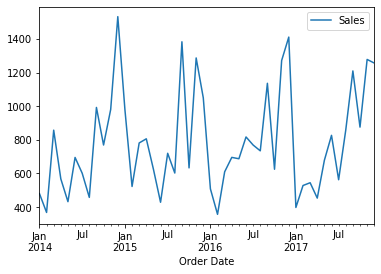

In [24]:
# Check the trend
y.plot()

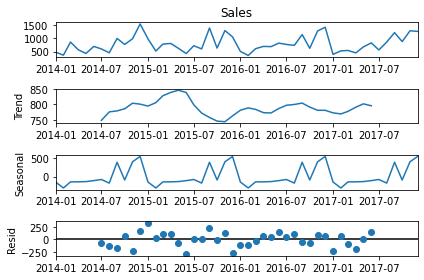

In [25]:
# Check the dataset components by using the Decomposition method
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(y['Sales'] , period = 12)
decomposition.plot()
plt.show()

In [26]:
#The plot above clearly shows that the sales of furniture is unstable, along with its obvious seasonality.


In [27]:
# To check whether or data is stationary or not using the Augmented Decay Fuller Test
from statsmodels.tsa.stattools import adfuller

In [28]:
adfuller(y['Sales'])

(-5.191070187339277,
 9.16875665566545e-06,
 10,
 37,
 {'1%': -3.6209175221605827,
  '5%': -2.9435394610388332,
  '10%': -2.6104002410518627},
 521.9616303121272)

In [29]:
# Creating a function to explain the above values(remember this function, u can use it always)
def adf_check(timeseries):
    result = adfuller(timeseries)
    print('Augmented Decay Fuller Test : ')
    labels = ['ADF Test Statistics', 'p-value' ,'#Lags', 'No of obs' ]
    
    for a , b in zip(result, labels):
        print(b + ' : ' + str(a))
        
    if result[1] <= 0.05:
        print('\nStrong evidence against null hypothesis and my time series is stationary')
    else:
        print('\nWeak evidence against null hypothesis and my time series is non stationary')

In [30]:
adf_check(y['Sales'])

Augmented Decay Fuller Test : 
ADF Test Statistics : -5.191070187339277
p-value : 9.16875665566545e-06
#Lags : 10
No of obs : 37

Strong evidence against null hypothesis and my time series is stationary


In [31]:
# Our data is stationary
# Trend d = 0

In [32]:
# Calculating the D value for seasonality
y['seasonality'] = y['Sales'] - y['Sales'].shift(12)

In [33]:
y.head()

,Sales,seasonality
Order Date,,
2014-01-01,480.194231,NaN
2014-02-01,367.931600,NaN
2014-03-01,857.291529,NaN
2014-04-01,567.488357,NaN
2014-05-01,432.049188,NaN


In [34]:
adf_check(y['seasonality'].dropna())

Augmented Decay Fuller Test : 
ADF Test Statistics : -4.168949509959848
p-value : 0.0007433441885203986
#Lags : 4
No of obs : 31

Strong evidence against null hypothesis and my time series is stationary


In [35]:
# D = 1

In [36]:
# To find the values of p&P and q&Q we will use graphs
from statsmodels.graphics.tsaplots import plot_pacf , plot_acf

/Users/priyankac/opt/anaconda3/lib/python3.8/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


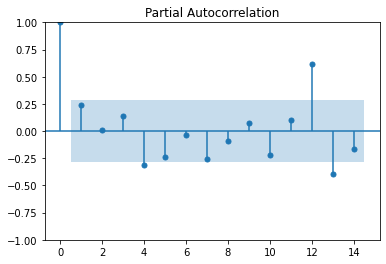

In [37]:
plot_pacf(y['Sales'] , lags = 14)
plt.show()

In [38]:
# p = 0

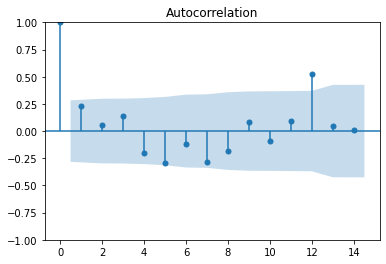

In [39]:
plot_acf(y['Sales'].dropna(), lags = 14)
plt.show()

In [40]:
# q = 0

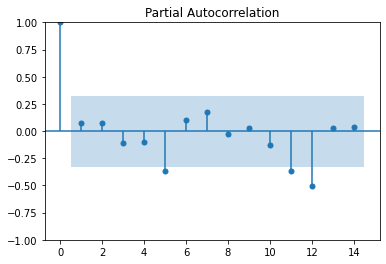

In [41]:
plot_pacf(y['seasonality'].dropna(), lags = 14)
plt.show()

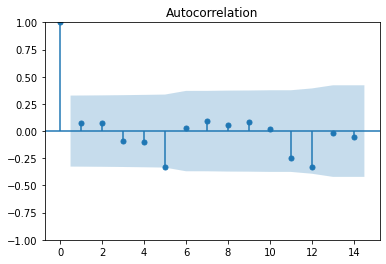

In [42]:
plot_acf(y['seasonality'].dropna(), lags = 14)
plt.show()

In [43]:
# P = 0
# Q = 0

In [44]:
# Trend:
# d = 0 
# p = 0       
# q = 0

# Seasonality:
# P = 0 
# D = 1 
# Q = 0 

### Model Time Series Analysis and Forecasting

In [45]:
# Automation to find best pdq value and less AIC value for better value
import itertools

In [46]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

In [47]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))


Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [48]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            model = sm.tsa.statespace.SARIMAX(y['Sales'] , order = param ,
                                 seasonal_order = param_seasonal ,
                                  enforce_stationarity=False, enforce_invertibility=False ) 
            results = model.fit()
            print('ARIMA{}x{} - AIC :{}'.format(param,param_seasonal,results.aic))
        except :
            continue

 This problem is unconstrained.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.
/Users/priyankac/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.99048D+00    |proj g|=  1.66962D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      2      3      1     0     0   2.398D-07   7.990D+00
  F =   7.9904349200061615     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 0, 0)x(0, 0, 0, 12) - AIC :769.0817523205915
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables


 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
/Users/priyankac/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
 This problem is unconstrained.
/Users/priyankac/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      3     68      3     1     0   9.038D+04   2.816D+01
  F =   28.161944833574211     

ABNORMAL_TERMINATION_IN_LNSRCH                              
ARIMA(0, 0, 1)x(0, 0, 1, 12) - AIC :2709.546704023124
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.81850D+00    |proj g|=  1.63640D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/priyankac/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.
/Users/priyankac/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.
 This problem is unconstrained.
/Users/priyankac

  ys=-2.292E+05  -gs= 1.287E-02 BFGS update SKIPPED
  ys=-4.291E+01  -gs= 3.824E+01 BFGS update SKIPPED

At iterate    5    f=  2.48035D+01    |proj g|=  1.64150D+05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      5     34      1     2     0   1.641D+05   2.480D+01
  F =   24.803482234621580     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(0, 0, 1)x(1, 0, 1, 12) - AIC :2389.1342945236715
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.30136D+00

 This problem is unconstrained.
/Users/priyankac/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.



At iterate   25    f=  2.95716D+00    |proj g|=  2.16602D-03

At iterate   30    f=  2.95701D+00    |proj g|=  1.47909D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     33     45      1     0     0   4.124D-06   2.957D+00
  F =   2.9570058088392082     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 0, 1)x(1, 1, 1, 12) - AIC :291.872557648564
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.04097D+00    |proj g|=  1.08020D-04

           * * *

 This problem is unconstrained.
 This problem is unconstrained.
/Users/priyankac/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.
/Users/priyankac/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


  ys=-1.777E+02  -gs= 7.006E-01 BFGS update SKIPPED
  ys=-1.453E+02  -gs= 7.049E-01 BFGS update SKIPPED

At iterate    5    f=  1.26126D+01    |proj g|=  1.36997D+04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      8     47      3     2     0   2.318D-06   1.255D+01
  F =   12.547376371704459     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC :1210.548131683628
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.28929D+00 

 This problem is unconstrained.
/Users/priyankac/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


  ys=-1.227E+05  -gs= 5.106E-03 BFGS update SKIPPED
  ys=-6.018E-03  -gs= 4.170E-03 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      5     92      2     2     0   3.276D+05   1.699D+01
  F =   16.989744641289892     

ABNORMAL_TERMINATION_IN_LNSRCH                              
ARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC :1637.0154855638295
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.76190D+00    |proj g|=  1.01285D-01

At iterate    5    f=  4.74718D+00


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/priyankac/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.
/Users/priyankac/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.
 This problem is unconstrained.



At iterate   20    f=  2.87919D+00    |proj g|=  1.99187D-02

At iterate   25    f=  2.85662D+00    |proj g|=  4.00635D-02

At iterate   30    f=  2.84985D+00    |proj g|=  3.99553D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     34     44      1     0     0   1.379D-05   2.850D+00
  F =   2.8497981580010738     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(0, 1, 1)x(0, 1, 1, 12) - AIC :279.5806231681031
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0

 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/priyankac/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



At iterate    5    f=  1.19628D+01    |proj g|=  1.33030D+06
  ys=-5.309E+06  -gs= 3.292E+00 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      6    119      4     2     0   1.330D+06   1.196D+01
  F =   11.962779780778535     

ABNORMAL_TERMINATION_IN_LNSRCH                              
ARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC :1156.4268589547394
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.23022D+00    |proj g|=  3.65785D-02

At iterate    5    f=  3

/Users/priyankac/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.


Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.97823D+00    |proj g|=  1.76039D-01

At iterate    5    f=  2.93137D+00    |proj g|=  4.51405D-02

At iterate   10    f=  2.92843D+00    |proj g|=  1.02500D-03

At iterate   15    f=  2.92822D+00    |proj g|=  2.90988D-02

At iterate   20    f=  2.89347D+00    |proj g|=  2.64524D-01

At iterate   25    f=  2.85822D+00    |proj g|=  2.18974D-01

At iterate   30    f=  2.84956D+00    |proj g|=  8.30479D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     33     45     


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/priyankac/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.
/Users/priyankac/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is


At iterate    5    f=  2.08500D+01    |proj g|=  3.38803D+00
  ys=-1.588E+01  -gs= 6.990E-01 BFGS update SKIPPED
  ys=-2.597E+01  -gs= 7.098E-01 BFGS update SKIPPED
  ys=-2.509E+01  -gs= 7.091E-01 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      9     97      2     3     0   1.571D+05   1.192D+01
  F =   11.924821244234082     

ABNORMAL_TERMINATION_IN_LNSRCH                              
ARIMA(1, 0, 0)x(1, 0, 1, 12) - AIC :1152.7828394464718
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exact


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/priyankac/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.
/Users/priyankac/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.



At iterate   10    f=  3.14460D+00    |proj g|=  2.49106D-03

At iterate   15    f=  3.14450D+00    |proj g|=  4.78054D-03

At iterate   20    f=  3.13450D+00    |proj g|=  6.55616D-02

At iterate   25    f=  3.10013D+00    |proj g|=  7.09172D-02

At iterate   30    f=  3.08947D+00    |proj g|=  1.52025D-02

At iterate   35    f=  3.08942D+00    |proj g|=  3.72360D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     35     42      1     0     0   3.724D-06   3.089D+00
  F =   3.0894194709831582     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 0, 0)x(1, 1, 1, 12) - AIC :304.58426921438

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
/Users/priyankac/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  3.01183D+00    |proj g|=  2.30374D-03

At iterate   10    f=  3.01121D+00    |proj g|=  2.68350D-03

At iterate   15    f=  3.00354D+00    |proj g|=  8.43226D-02

At iterate   20    f=  2.97263D+00    |proj g|=  3.96827D-03

At iterate   25    f=  2.97231D+00    |proj g|=  2.58362D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     25     28      1     0     0   2.584D-06   2.972D+00
  F =   2.9723147853811525     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 0, 1)x(0, 1, 1, 12) - AIC :293.3422193965906
RUNNING THE L-BFGS-B CODE

           * * *

Machine precis

 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/priyankac/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      4     72      2     0     0   4.077D+03   2.470D+01
  F =   24.700755105200013     

ABNORMAL_TERMINATION_IN_LNSRCH                              
ARIMA(1, 0, 1)x(1, 0, 1, 12) - AIC :2381.272490099201
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.15364D+00    |proj g|=  6.09532D-02

At iterate    5    f=  3.14852D+00    |proj g|=  6.15364D-03

At iterate   10    f=  3.14679D+00    |proj g|=  2.38067D-02

At iterate   15

/Users/priyankac/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.



At iterate   10    f=  3.01179D+00    |proj g|=  1.00053D-03

At iterate   15    f=  3.01166D+00    |proj g|=  7.46526D-03

At iterate   20    f=  3.01000D+00    |proj g|=  1.42643D-02

At iterate   25    f=  2.99312D+00    |proj g|=  7.16876D-02

At iterate   30    f=  2.97362D+00    |proj g|=  9.14442D-02

At iterate   35    f=  2.95836D+00    |proj g|=  1.12843D-01

At iterate   40    f=  2.95574D+00    |proj g|=  1.00949D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     43     56      1     0     0   5.851D-06   2.956D+00
  F =   2.9557429042849606     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL  

 This problem is unconstrained.
 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/priyankac/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.
/Users/priyankac/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is


At iterate    5    f=  1.47479D+01    |proj g|=  8.39222D+04
  ys=-2.073E+01  -gs= 6.832E-01 BFGS update SKIPPED

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      6     85      2     2     0   8.392D+04   1.475D+01
  F =   14.747855252875574     

ABNORMAL_TERMINATION_IN_LNSRCH                              
ARIMA(1, 1, 0)x(0, 0, 1, 12) - AIC :1421.7941042760551
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.95000D+00    |proj g|=  4.81428D-06

           * * *

Tit   

 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/priyankac/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.
/Users/priyankac/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.


  ys=-4.484E+01  -gs= 6.975E-01 BFGS update SKIPPED

At iterate    5    f=  1.25055D+01    |proj g|=  8.06298D+04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      7     92      2     2     0   2.061D+04   1.244D+01
  F =   12.437213106188240     

ABNORMAL_TERMINATION_IN_LNSRCH                              
ARIMA(1, 1, 0)x(1, 0, 1, 12) - AIC :1201.9724581940711
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.10197D+00    |proj g|=  1.68835D-02

At iterate    5    f=  3

 This problem is unconstrained.
 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/priyankac/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      5     73      2     1     0   3.316D+05   2.350D+01
  F =   23.497868723737525     

ABNORMAL_TERMINATION_IN_LNSRCH                              
ARIMA(1, 1, 1)x(0, 0, 1, 12) - AIC :2263.7953974788024
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.77247D+00    |proj g|=  5.57251D-02

At iterate    5    f=  4.74738D+00    |proj g|=  7.45904D-02

At iterate   10    f=  4.74215D+00    |proj g|=  5.05521D-04

At iterate   1

/Users/priyankac/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.
 This problem is unconstrained.


At iterate   25    f=  2.84939D+00    |proj g|=  4.57850D-02

At iterate   30    f=  2.84778D+00    |proj g|=  1.98119D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     31     42      1     1     0   2.276D-06   2.848D+00
  F =   2.8477843822285305     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 1, 1)x(0, 1, 1, 12) - AIC :281.3873006939389
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.94554D+00    |proj g|=  4.47276D-02

At iterate    5 

 This problem is unconstrained.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
/Users/priyankac/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      4     71      2     1     0   2.054D+06   4.339D+00
  F =   4.3393701789132253     

ABNORMAL_TERMINATION_IN_LNSRCH                              
ARIMA(1, 1, 1)x(1, 0, 1, 12) - AIC :426.57953717566966
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.09103D+00    |proj g|=  3.72719D-02

At iterate    5    f=  3.08056D+00    |proj g|=  3.47745D-02

At iterate   10    f=  3.07783D+00    |proj g|=  1.16849D-03
  ys=-2.589E-04

/Users/priyankac/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.


In [49]:
# ARIMA(1, 1, 1)x(1, 1, 1, 12) - AIC :283.3661018696623

In [50]:
# Fiting the ARIMA model
model = sm.tsa.statespace.SARIMAX(y['Sales'],
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = model.fit()


/Users/priyankac/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.98342D+00    |proj g|=  1.76988D-01

At iterate    5    f=  2.94075D+00    |proj g|=  1.72204D-01

At iterate   10    f=  2.92298D+00    |proj g|=  1.23344D-02

At iterate   15    f=  2.92270D+00    |proj g|=  1.02674D-03

At iterate   20    f=  2.92162D+00    |proj g|=  6.40701D-02

At iterate   25    f=  2.86053D+00    |proj g|=  1.46428D-01

At iterate   30    f=  2.84756D+00    |proj g|=  5.63584D-03

At iterate   35    f=  2.84756D+00    |proj g|=  2.44754D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

 This problem is unconstrained.


In [51]:
print(results.summary())

                                     SARIMAX Results                                      
Dep. Variable:                              Sales   No. Observations:                   48
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -136.683
Date:                            Thu, 25 Aug 2022   AIC                            283.366
Time:                                    15:41:14   BIC                            288.589
Sample:                                01-01-2014   HQIC                           284.500
                                     - 12-01-2017                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0949      0.313     -0.303      0.762      -0.708       0.518
ma.L1         -1.0000      0.415   

In [52]:
print(len(y))

48


In [53]:
# Predict with the training dataset

y['forecast'] = results.predict(start = 37 , dynamic = True) 


In [54]:
y.head()

,Sales,seasonality,forecast
Order Date,,,
2014-01-01,480.194231,NaN,NaN
2014-02-01,367.931600,NaN,NaN
2014-03-01,857.291529,NaN,NaN
2014-04-01,567.488357,NaN,NaN
2014-05-01,432.049188,NaN,NaN


In [55]:
y.tail()

,Sales,seasonality,forecast
Order Date,,,
2017-08-01,857.881889,123.574107,702.982786
2017-09-01,1209.508583,73.555213,1198.043218
2017-10-01,875.362728,250.490254,659.267084
2017-11-01,1277.817759,6.472607,1270.724443
2017-12-01,1256.298672,-154.421136,1361.526904


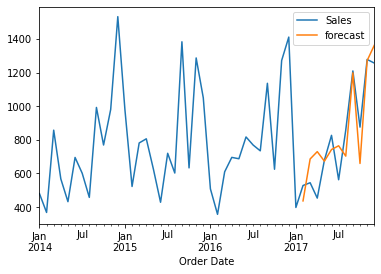

In [56]:
y[['Sales','forecast']].plot()
plt.show()

In [57]:
# The line plot is showing the observed values compared to the rolling forecast predictions.
# Overall, our forecasts align with the true values very well, showing an upward trend starts 
# from the beginning of the year and captured the seasonality toward the end of the year.


In [58]:
# Will generate some future dates to make prediction

In [59]:
from pandas.tseries.offsets import DateOffset

In [60]:
y.head()

,Sales,seasonality,forecast
Order Date,,,
2014-01-01,480.194231,NaN,NaN
2014-02-01,367.931600,NaN,NaN
2014-03-01,857.291529,NaN,NaN
2014-04-01,567.488357,NaN,NaN
2014-05-01,432.049188,NaN,NaN


In [61]:
y.tail()

,Sales,seasonality,forecast
Order Date,,,
2017-08-01,857.881889,123.574107,702.982786
2017-09-01,1209.508583,73.555213,1198.043218
2017-10-01,875.362728,250.490254,659.267084
2017-11-01,1277.817759,6.472607,1270.724443
2017-12-01,1256.298672,-154.421136,1361.526904


In [62]:
future_dates = [y.index[-1] + DateOffset(months = x) for x in range(0,13)] 

In [63]:
future_dates

[Timestamp('2017-12-01 00:00:00'),
 Timestamp('2018-01-01 00:00:00'),
 Timestamp('2018-02-01 00:00:00'),
 Timestamp('2018-03-01 00:00:00'),
 Timestamp('2018-04-01 00:00:00'),
 Timestamp('2018-05-01 00:00:00'),
 Timestamp('2018-06-01 00:00:00'),
 Timestamp('2018-07-01 00:00:00'),
 Timestamp('2018-08-01 00:00:00'),
 Timestamp('2018-09-01 00:00:00'),
 Timestamp('2018-10-01 00:00:00'),
 Timestamp('2018-11-01 00:00:00'),
 Timestamp('2018-12-01 00:00:00')]

In [64]:
future_dates_df = pd.DataFrame(index = future_dates[1:], columns =y.columns)

In [65]:
future_dates_df.head()

,Sales,seasonality,forecast
2018-01-01,NaN,NaN,NaN
2018-02-01,NaN,NaN,NaN
2018-03-01,NaN,NaN,NaN
2018-04-01,NaN,NaN,NaN
2018-05-01,NaN,NaN,NaN


In [66]:
future_dates_df.tail()

,Sales,seasonality,forecast
2018-08-01,NaN,NaN,NaN
2018-09-01,NaN,NaN,NaN
2018-10-01,NaN,NaN,NaN
2018-11-01,NaN,NaN,NaN
2018-12-01,NaN,NaN,NaN


In [67]:
future_df = pd.concat([y,future_dates_df])

In [68]:
future_df.head(20)

,Sales,seasonality,forecast
2014-01-01,480.194231,NaN,NaN
2014-02-01,367.9316,NaN,NaN
2014-03-01,857.291529,NaN,NaN
2014-04-01,567.488357,NaN,NaN
2014-05-01,432.049188,NaN,NaN
2014-06-01,695.059242,NaN,NaN
2014-07-01,601.1695,NaN,NaN
2014-08-01,457.521656,NaN,NaN
2014-09-01,992.353367,NaN,NaN
2014-10-01,769.015437,NaN,NaN


In [69]:
future_df.tail(20)

,Sales,seasonality,forecast
2017-05-01,678.302328,-8.962899,672.847528
2017-06-01,826.460291,9.549541,742.079545
2017-07-01,562.524857,-206.211555,764.384105
2017-08-01,857.881889,123.574107,702.982786
2017-09-01,1209.508583,73.555213,1198.043218
2017-10-01,875.362728,250.490254,659.267084
2017-11-01,1277.817759,6.472607,1270.724443
2017-12-01,1256.298672,-154.421136,1361.526904
2018-01-01,NaN,NaN,NaN
2018-02-01,NaN,NaN,NaN


In [70]:
future_df.shape

(60, 3)

In [71]:
future_df['forecast'] = results.predict( start = 47, end = 59, dynamic = True)

<AxesSubplot:>

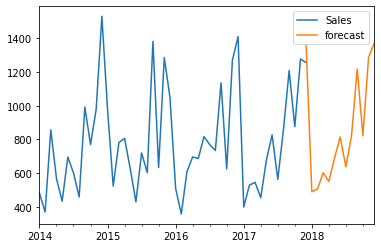

In [72]:
future_df[['Sales','forecast']].plot()

In [73]:
future_df.tail(20)

,Sales,seasonality,forecast
2017-05-01,678.302328,-8.962899,NaN
2017-06-01,826.460291,9.549541,NaN
2017-07-01,562.524857,-206.211555,NaN
2017-08-01,857.881889,123.574107,NaN
2017-09-01,1209.508583,73.555213,NaN
2017-10-01,875.362728,250.490254,NaN
2017-11-01,1277.817759,6.472607,NaN
2017-12-01,1256.298672,-154.421136,1358.786693
2018-01-01,NaN,NaN,488.942463
2018-02-01,NaN,NaN,505.501343


In [74]:
future_df.to_csv('sales_forecasting.csv')